In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open("610_8.csv") as f_610_8:
    reader = csv.reader(f_610_8)
#    next(reader) # skip header
    data_610_8 = [r for r in reader]

with open("610_30.csv") as f_610_30:
    reader = csv.reader(f_610_30)
#    next(reader) # skip header
    data_610_30 = [r for r in reader]
    
with open("470_8.csv") as f_470_8:
    reader = csv.reader(f_470_8)
#    next(reader) # skip header
    data_470_8 = [r for r in reader]

with open("470_30.csv") as f_470_30:
    reader = csv.reader(f_470_30)
#    next(reader) # skip header
    data_470_30 = [r for r in reader]  

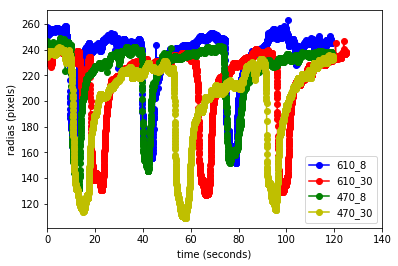

In [39]:
frame_rate_610_8 = 35
frame_rate_610_30 = 36
frame_rate_470_8 = 31
frame_rate_470_30 = 38

x_data_610_8 = []
y_data_610_8 = []
x_data_610_30 = []
y_data_610_30 = []
x_data_470_8 = []
y_data_470_8 = []
x_data_470_30 = []
y_data_470_30 = []


for i in range(len(data_610_8)):
    x_data_610_8.append(i/frame_rate_610_8)
    y_data_610_8.append(float(data_610_8[i][0]))
for i in range(len(data_610_30)):
    x_data_610_30.append(i/frame_rate_610_30)
    y_data_610_30.append(float(data_610_30[i][0]))
for i in range(len(data_470_8)):
    x_data_470_8.append(i/frame_rate_470_8)
    y_data_470_8.append(float(data_470_8[i][0]))
for i in range(len(data_470_30)):
    x_data_470_30.append(i/frame_rate_470_30)
    y_data_470_30.append(float(data_470_30[i][0]))   

f = plt.figure()
plt.plot(x_data_610_8,y_data_610_8,marker='o',color='b',label="610_8")
plt.plot(x_data_610_30,y_data_610_30,marker='o',color='r',label="610_30")
plt.plot(x_data_470_8,y_data_470_8,marker='o',color='g',label="470_8")
plt.plot(x_data_470_30,y_data_470_30,marker='o',color='y',label="470_30")
plt.xlim(0,140)
plt.xlabel('time (seconds)')
plt.ylabel('radias (pixels)')
plt.legend()
#plt.show()
f.savefig("plot.pdf", bbox_inches='tight')

In [32]:
def PIPR(filename):   # filename is '470_8', '470_30', '610_8', or '610_30'
    print(filename)
    if filename == '470_8':
        frame_rate = frame_rate_470_8
        y_data = y_data_470_8
    elif filename == '470_30':
        frame_rate = frame_rate_470_30
        y_data = y_data_470_30
    elif filename == '610_8':
        frame_rate = frame_rate_610_8
        y_data = y_data_610_8
    elif filename == '610_30':
        frame_rate = frame_rate_610_30
        y_data = y_data_610_30
    else:
        print('Wrong parameter!')
        return
        
    baseline_start_frame = frame_rate*3      # from 4 sec
    baseline_end_frame = frame_rate*10       # to 10 sec

    onset1_start_frame = frame_rate*11      # from 12 sec
    onset1_end_frame = frame_rate*15        # to 15 sec
    offset1_start_frame = frame_rate*25     # from 26 sec
    offset1_end_frame = frame_rate*45       # to 45 sec

    onset2_start_frame = frame_rate*46      # from 47 sec
    onset2_end_frame = frame_rate*50        # to 50 sec
    offset2_start_frame = frame_rate*60     # from 61 sec
    offset2_end_frame = frame_rate*80       # to 80 sec

    onset3_start_frame = frame_rate*81      # from 82 sec
    onset3_end_frame = frame_rate*85        # to 85 sec
    offset3_start_frame = frame_rate*95     # from 96 sec
    offset3_end_frame = frame_rate*115      # to 115 sec

    temp = y_data[baseline_start_frame:baseline_end_frame]
    baseline_pupil_diameter = sum(temp)/len(temp)
    print("baseline:", baseline_pupil_diameter)
    print()

    temp = y_data[offset1_start_frame:offset1_end_frame]
    sustained1_pupil_diameter = sum(temp)/len(temp)
    PIPR1 = baseline_pupil_diameter - sustained1_pupil_diameter
    PIPR1_Change = PIPR1*100/baseline_pupil_diameter
    print("sustained(1st time):", sustained1_pupil_diameter)
    print("PIPR(1st time):", PIPR1)
    print("PIPR Change(%)(1st time):", PIPR1_Change)
    print()

    temp = y_data[offset2_start_frame:offset2_end_frame]
    sustained2_pupil_diameter = sum(temp)/len(temp)
    PIPR2 = baseline_pupil_diameter - sustained2_pupil_diameter
    PIPR2_Change = PIPR2*100/baseline_pupil_diameter
    print("sustained(2nd time):", sustained2_pupil_diameter)
    print("PIPR(2nd time):", PIPR2)
    print("PIPR Change(%)(2nd time):", PIPR2_Change)
    print()

    temp = y_data[offset3_start_frame:offset3_end_frame]
    sustained3_pupil_diameter = sum(temp)/len(temp)
    PIPR3 = baseline_pupil_diameter - sustained3_pupil_diameter
    PIPR3_Change = PIPR3*100/baseline_pupil_diameter
    print("sustained(3rd time):", sustained3_pupil_diameter)
    print("PIPR(3rd time):", PIPR3)
    print("PIPR Change(%)(3rd time):", PIPR3_Change)
    print()

In [33]:
PIPR('470_30')

470_30
baseline: 237.634997917001

sustained(1st time): 220.18534986079348
PIPR(1st time): 17.449648056207508
PIPR Change(%)(1st time): 7.343046356455527

sustained(2nd time): 202.38061807286454
PIPR(2nd time): 35.25437984413645
PIPR Change(%)(2nd time): 14.83551671814342

sustained(3rd time): 203.9361345220296
PIPR(3rd time): 33.6988633949714
PIPR Change(%)(3rd time): 14.180934496332661



In [34]:
PIPR('470_8')

470_8
baseline: 243.10279408144834

sustained(1st time): 220.60780799798457
PIPR(1st time): 22.494986083463772
PIPR Change(%)(1st time): 9.253281587511136

sustained(2nd time): 218.2401133357334
PIPR(2nd time): 24.862680745714925
PIPR Change(%)(2nd time): 10.227229530477965

sustained(3rd time): 234.34589301864415
PIPR(3rd time): 8.75690106280419
PIPR Change(%)(3rd time): 3.602139208597622



In [35]:
PIPR('610_30')

610_30
baseline: 238.73889695284734

sustained(1st time): 223.3293040281726
PIPR(1st time): 15.40959292467474
PIPR Change(%)(1st time): 6.45457992868177

sustained(2nd time): 197.70279230489749
PIPR(2nd time): 41.036104647949855
PIPR Change(%)(2nd time): 17.188696593523584

sustained(3rd time): 199.4190247870788
PIPR(3rd time): 39.319872165768544
PIPR Change(%)(3rd time): 16.469822332108077



In [36]:
PIPR('610_8')

610_8
baseline: 248.4979202276246

sustained(1st time): 225.98882036518506
PIPR(1st time): 22.50909986243954
PIPR Change(%)(1st time): 9.058063681909756

sustained(2nd time): 227.17195821367852
PIPR(2nd time): 21.325962013946082
PIPR Change(%)(2nd time): 8.581947886892356

sustained(3rd time): 245.7976678543532
PIPR(3rd time): 2.700252373271411
PIPR Change(%)(3rd time): 1.0866297676849666

